# Modeling Exercises 

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Custom module imports
import wrangle as w

## 1.

Select a dataset with a continuous target variable.

**I will be using the Zillow dataset**

## 2.

Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

### Acquire

In [2]:
df = w.wrangle_zillow_no_split()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
7,3,2.0,2077,646760.0,1926,7924.68,06037
18,3,1.0,1244,169471.0,1950,2532.88,06037
19,3,2.0,1300,233266.0,1950,3110.99,06037
20,3,2.0,1222,290492.0,1951,3870.25,06037
40,2,1.0,725,37548.0,1953,576.47,06037


In [4]:
df.fips.value_counts()

06037    1192293
06059     456687
06111     141233
Name: fips, dtype: Int64

In [5]:
df.bedroomcnt.value_counts()

3    879491
4    522716
2    301940
5     86066
Name: bedroomcnt, dtype: int64

In [6]:
df.bathroomcnt.value_counts()

2.00    891382
1.00    358365
3.00    341091
2.50    128457
4.00     29810
1.50     29648
3.50     11457
1.75         3
Name: bathroomcnt, dtype: int64

**When should these start to be treated as categories and not continuous variables?**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790213 entries, 7 to 2152853
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          string 
dtypes: float64(3), int64(3), string(1)
memory usage: 109.3 MB


### Encode

In [8]:
# fips column should be encoded since it is categorical (county)

In [9]:
df = pd.get_dummies(data=df, columns=['fips'])

In [10]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips_06037,fips_06059,fips_06111
7,3,2.0,2077,646760.0,1926,7924.68,1,0,0
18,3,1.0,1244,169471.0,1950,2532.88,1,0,0
19,3,2.0,1300,233266.0,1950,3110.99,1,0,0
20,3,2.0,1222,290492.0,1951,3870.25,1,0,0
40,2,1.0,725,37548.0,1953,576.47,1,0,0


### Split

In [11]:
train, validate, test = w.split_zillow(df)

In [12]:
train.shape, validate.shape, test.shape

((1433959, 9), (177232, 9), (179022, 9))

### Scale

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790213 entries, 7 to 2152853
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips_06037                    uint8  
 7   fips_06059                    uint8  
 8   fips_06111                    uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 100.7 MB


In [14]:
cols_to_scale = df.select_dtypes(['int64', 'float64']).columns.tolist()
cols_to_scale.pop(3)
cols_to_scale

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'yearbuilt',
 'taxamount']

In [15]:
train_scaled, validate_scaled, test_scaled = w.add_scaled_columns(train, validate, test, MinMaxScaler(), cols_to_scale)

In [16]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips_06037,fips_06059,fips_06111,bedroomcnt_scaled,bathroomcnt_scaled,calculatedfinishedsquarefeet_scaled,yearbuilt_scaled,taxamount_scaled
1029630,2,2.0,2061,312381.0,1956,4080.30,1,0,0,0.000000,0.333333,0.604106,0.450549,0.394506
1168014,4,2.0,1902,420728.0,1971,4843.26,1,0,0,0.666667,0.333333,0.557478,0.615385,0.468613
488819,3,2.0,2086,143683.0,1955,2194.57,1,0,0,0.333333,0.333333,0.611437,0.439560,0.211343
243088,4,2.0,2096,731905.0,1959,8656.04,1,0,0,0.666667,0.333333,0.614370,0.483516,0.838953
1508871,3,4.0,2876,780947.0,1959,9569.81,1,0,0,0.333333,1.000000,0.843109,0.483516,0.927708


In [17]:
# drop unscaled columns
train_scaled = train_scaled.drop(columns=cols_to_scale)
validate_scaled = validate_scaled.drop(columns=cols_to_scale)
test_scaled = test_scaled.drop(columns=cols_to_scale)

In [18]:
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((1433959, 9), (177232, 9), (179022, 9))

In [19]:
train_scaled.head()

,taxvaluedollarcnt,fips_06037,fips_06059,fips_06111,bedroomcnt_scaled,bathroomcnt_scaled,calculatedfinishedsquarefeet_scaled,yearbuilt_scaled,taxamount_scaled
1029630,312381.0,1,0,0,0.000000,0.333333,0.604106,0.450549,0.394506
1168014,420728.0,1,0,0,0.666667,0.333333,0.557478,0.615385,0.468613
488819,143683.0,1,0,0,0.333333,0.333333,0.611437,0.439560,0.211343
243088,731905.0,1,0,0,0.666667,0.333333,0.614370,0.483516,0.838953
1508871,780947.0,1,0,0,0.333333,1.000000,0.843109,0.483516,0.927708


## 3.

Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

### X and y

In [20]:
# split into X and y for all splits

X_train = train_scaled.drop(columns='taxvaluedollarcnt')
y_train = train_scaled.taxvaluedollarcnt
X_validate = validate_scaled.drop(columns='taxvaluedollarcnt')
y_validate = validate_scaled.taxvaluedollarcnt
X_test = test_scaled.drop(columns='taxvaluedollarcnt')
y_test = test_scaled.taxvaluedollarcnt

### Target Distribution

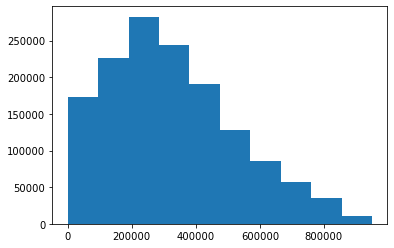

In [21]:
# take a look at dist of target
plt.hist(y_train);

**Doesn't look normal, looks right-skewed, try inverse gaussian and gamma**

### Baseline

In [22]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [23]:
# Predict baseline_mean
y_train.taxvaluedollarcnt.mean()

328126.24719953636

In [24]:
baseline_mean = y_train.taxvaluedollarcnt.mean()
y_train['baseline_mean'] = baseline_mean
y_validate['baseline_mean'] = baseline_mean

In [25]:
# Predict baseline_median
y_train.taxvaluedollarcnt.median()

297618.0

In [26]:
baseline_median = y_train.taxvaluedollarcnt.median()
y_train['baseline_median'] = baseline_median
y_validate['baseline_median'] = baseline_median

In [27]:
# make function to add all metrics to df
def make_metric_df(y_train_actual, y_train_pred, y_validate_actual, y_validate_pred, model_name, metric_df):
    if metric_df.size == 0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_train': round(mean_squared_error(
                    y_train_actual,
                    y_train_pred,
                    squared=False),2),
                'RMSE_validate': round(mean_squared_error(
                    y_validate_actual,
                    y_validate_pred,
                    squared=False),2),
                'RMSE_diff' : round((mean_squared_error(
                    y_train_actual,
                    y_train_pred,
                    squared=False))
                    -
                    (mean_squared_error(
                    y_validate_actual,
                    y_validate_pred,
                    squared=False)),2),
                'R2_train': round(explained_variance_score(
                    y_train_actual,
                    y_train_pred),2),
                'R2_validate': round(explained_variance_score(
                    y_validate_actual,
                    y_validate_pred),2),
                "R2_diff" : round((explained_variance_score(
                    y_train_actual,
                    y_train_pred))
                    -
                    (explained_variance_score(
                    y_validate_actual,
                    y_validate_pred)),2)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_train': round(mean_squared_error(
                    y_train_actual,
                    y_train_pred,
                    squared=False),2),
                'RMSE_validate': round(mean_squared_error(
                    y_validate_actual,
                    y_validate_pred,
                    squared=False),2),
                'RMSE_diff' : round((mean_squared_error(
                    y_train_actual,
                    y_train_pred,
                    squared=False))
                    -
                    (mean_squared_error(
                    y_validate_actual,
                    y_validate_pred,
                    squared=False)),2),
                'R2_train': round(explained_variance_score(
                    y_train_actual,
                    y_train_pred),2),
                'R2_validate': round(explained_variance_score(
                    y_validate_actual,
                    y_validate_pred),2),
                "R2_diff" : round((explained_variance_score(
                    y_train_actual,
                    y_train_pred))
                    -
                    (explained_variance_score(
                    y_validate_actual,
                    y_validate_pred)),2)
            }, ignore_index=True)

In [28]:
# create empty df to start appending to
metric_df = pd.DataFrame()
metric_df.size

0

In [29]:
# get RMSE for baseline mean model
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.baseline_mean, squared=False)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.baseline_mean, squared=False)
rmse_train, rmse_validate

(197811.53853839467, 197143.15595510384)

In [30]:
# get metrics for baseline mean model
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.baseline_mean, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.baseline_mean, 
                           'baseline_mean', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.0,0.0,0.0


In [31]:
# get RMSE for baseline mean model
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.baseline_median, squared=False)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.baseline_median, squared=False)
rmse_train, rmse_validate

(200150.33831126752, 199496.57575021955)

In [32]:
# get metrics for baseline median model
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.baseline_median, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.baseline_median, 
                           'baseline_median', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.0,0.0,0.0
1,baseline_median,200150.34,199496.58,653.76,0.0,0.0,0.0


### LinearRegression (OLS)

In [33]:
# make model
ols = LinearRegression(normalize=True)

In [34]:
# fit model
ols.fit(X_train, y_train.taxvaluedollarcnt)

LinearRegression(normalize=True)

In [35]:
# Make prediction for train and validate
y_train['ols_y_pred'] = ols.predict(X_train)
y_validate['ols_y_pred'] = ols.predict(X_validate)

In [36]:
# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.ols_y_pred, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.ols_y_pred, 
                           'OLS', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0


### LassoLars

In [37]:
# create the model
lars = LassoLars(alpha=1)

# fit the model
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['lars_y_pred_alpha_1'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_1'] = lars.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.lars_y_pred_alpha_1, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.lars_y_pred_alpha_1, 
                           'lasso_alpha_1', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0


In [38]:
# create the model
lars = LassoLars(alpha=2)

# fit the model
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['lars_y_pred_alpha_2'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_2'] = lars.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.lars_y_pred_alpha_2, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.lars_y_pred_alpha_2, 
                           'lasso_alpha_2', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0


In [39]:
# create the model
lars = LassoLars(alpha=3)

# fit the model
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['lars_y_pred_alpha_3'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_3'] = lars.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.lars_y_pred_alpha_3, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.lars_y_pred_alpha_3, 
                           'lasso_alpha_3', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0


In [40]:
# create the model
lars = LassoLars(alpha=4)

# fit the model
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['lars_y_pred_alpha_4'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_4'] = lars.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.lars_y_pred_alpha_4, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.lars_y_pred_alpha_4, 
                           'lasso_alpha_4', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0


In [41]:
# create the model
lars = LassoLars(alpha=5)

# fit the model
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['lars_y_pred_alpha_5'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_5'] = lars.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.lars_y_pred_alpha_5, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.lars_y_pred_alpha_5, 
                           'lasso_alpha_5', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0
7,lasso_alpha_5,45245.64,44738.57,507.07,0.95,0.95,-0.0


In [42]:
# create the model
lars = LassoLars(alpha=10)

# fit the model
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['lars_y_pred_alpha_10'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_10'] = lars.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.lars_y_pred_alpha_10, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.lars_y_pred_alpha_10, 
                           'lasso_alpha_10', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0
7,lasso_alpha_5,45245.64,44738.57,507.07,0.95,0.95,-0.0
8,lasso_alpha_10,47379.89,46913.61,466.28,0.94,0.94,-0.0


### TweedieRegressor (GLM)

In [43]:
# create the model
glm = TweedieRegressor(power=0, alpha=0)

# fit the model
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['glm_y_pred_normal'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_normal'] = glm.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.glm_y_pred_normal, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.glm_y_pred_normal, 
                           'glm_normal', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0
7,lasso_alpha_5,45245.64,44738.57,507.07,0.95,0.95,-0.0
8,lasso_alpha_10,47379.89,46913.61,466.28,0.94,0.94,-0.0
9,glm_normal,44045.76,43511.22,534.54,0.95,0.95,-0.0


In [44]:
# create the model
glm = TweedieRegressor(power=1, alpha=0)

# fit the model
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['glm_y_pred_poisson'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_poisson'] = glm.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.glm_y_pred_poisson, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.glm_y_pred_poisson, 
                           'glm_poisson', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0
7,lasso_alpha_5,45245.64,44738.57,507.07,0.95,0.95,-0.0
8,lasso_alpha_10,47379.89,46913.61,466.28,0.94,0.94,-0.0
9,glm_normal,44045.76,43511.22,534.54,0.95,0.95,-0.0


In [45]:
# create the model
glm = TweedieRegressor(power=1.5, alpha=0)

# fit the model
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['glm_y_pred_poisson_gamma'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_poisson_gamma'] = glm.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.glm_y_pred_poisson_gamma, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.glm_y_pred_poisson_gamma, 
                           'glm_poisson_gamma', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0
7,lasso_alpha_5,45245.64,44738.57,507.07,0.95,0.95,-0.0
8,lasso_alpha_10,47379.89,46913.61,466.28,0.94,0.94,-0.0
9,glm_normal,44045.76,43511.22,534.54,0.95,0.95,-0.0


In [46]:
# create the model
glm = TweedieRegressor(power=2, alpha=0)

# fit the model
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['glm_y_pred_gamma'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_gamma'] = glm.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.glm_y_pred_gamma, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.glm_y_pred_gamma, 
                           'glm_gamma', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0
7,lasso_alpha_5,45245.64,44738.57,507.07,0.95,0.95,-0.0
8,lasso_alpha_10,47379.89,46913.61,466.28,0.94,0.94,-0.0
9,glm_normal,44045.76,43511.22,534.54,0.95,0.95,-0.0


In [47]:
# create the model
glm = TweedieRegressor(power=3, alpha=0)

# fit the model
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['glm_y_pred_i_gauss'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_i_gauss'] = glm.predict(X_validate)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.glm_y_pred_i_gauss, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.glm_y_pred_i_gauss, 
                           'glm_i_gauss', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0
7,lasso_alpha_5,45245.64,44738.57,507.07,0.95,0.95,-0.0
8,lasso_alpha_10,47379.89,46913.61,466.28,0.94,0.94,-0.0
9,glm_normal,44045.76,43511.22,534.54,0.95,0.95,-0.0


### Polynomial Regression

#### PolynomialFeatures

In [48]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate
X_validate_degree2 = pf.transform(X_validate)

In [49]:
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)

# fit and transform X_train
X_train_degree3 = pf3.fit_transform(X_train)

# transform X_validate
X_validate_degree3 = pf3.transform(X_validate)

In [50]:
# make the polynomial features to get a new set of features
pf4 = PolynomialFeatures(degree=4)

# fit and transform X_train
X_train_degree4 = pf4.fit_transform(X_train)

# transform X_validate
X_validate_degree4 = pf4.transform(X_validate)

#### LinearRegression

In [51]:
# create the model
lm2 = LinearRegression(normalize=True)

# fit the model
lm2.fit(X_train_degree2, y_train.taxvaluedollarcnt)

# predict train
y_train['lm2_y_pred'] = lm2.predict(X_train_degree2)

# predict validate
y_validate['lm2_y_pred'] = lm2.predict(X_validate_degree2)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.lm2_y_pred, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.lm2_y_pred, 
                           'lm2', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0
7,lasso_alpha_5,45245.64,44738.57,507.07,0.95,0.95,-0.0
8,lasso_alpha_10,47379.89,46913.61,466.28,0.94,0.94,-0.0
9,glm_normal,44045.76,43511.22,534.54,0.95,0.95,-0.0


In [52]:
# create the model
lm3 = LinearRegression(normalize=True)

# fit the model
lm3.fit(X_train_degree3, y_train.taxvaluedollarcnt)

# predict train
y_train['lm3_y_pred'] = lm3.predict(X_train_degree3)

# predict validate
y_validate['lm3_y_pred'] = lm3.predict(X_validate_degree3)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.lm3_y_pred, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.lm3_y_pred, 
                           'lm3', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,197811.54,197143.16,668.38,0.00,0.00,0.0
1,baseline_median,200150.34,199496.58,653.76,0.00,0.00,0.0
2,OLS,44045.76,43511.25,534.51,0.95,0.95,-0.0
3,lasso_alpha_1,44215.12,43684.19,530.93,0.95,0.95,-0.0
4,lasso_alpha_2,44542.29,44014.62,527.66,0.95,0.95,-0.0
5,lasso_alpha_3,44777.17,44255.63,521.55,0.95,0.95,-0.0
6,lasso_alpha_4,44982.73,44468.24,514.49,0.95,0.95,-0.0
7,lasso_alpha_5,45245.64,44738.57,507.07,0.95,0.95,-0.0
8,lasso_alpha_10,47379.89,46913.61,466.28,0.94,0.94,-0.0
9,glm_normal,44045.76,43511.22,534.54,0.95,0.95,-0.0


In [ ]:
# create the model
lm4 = LinearRegression(normalize=True)

# fit the model
lm4.fit(X_train_degree4, y_train.taxvaluedollarcnt)

# predict train
y_train['lm4_y_pred'] = lm4.predict(X_train_degree4)

# predict validate
y_validate['lm4_y_pred'] = lm4.predict(X_validate_degree4)

# get metrics
metric_df = make_metric_df(y_train.taxvaluedollarcnt, 
                           y_train.lm4_y_pred, 
                           y_validate.taxvaluedollarcnt, 
                           y_validate.lm4_y_pred, 
                           'lm4', 
                           metric_df)
metric_df